# Синхронизация сигналов на примере зашумленнной синусойды, пропущенной через схему 2

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from dataset_creator.model.signals.signals import Signal
from dataset_creator.model.signals.signal_synchronization import search_sync_signal

В начало сигнала добавлен сигнал вида

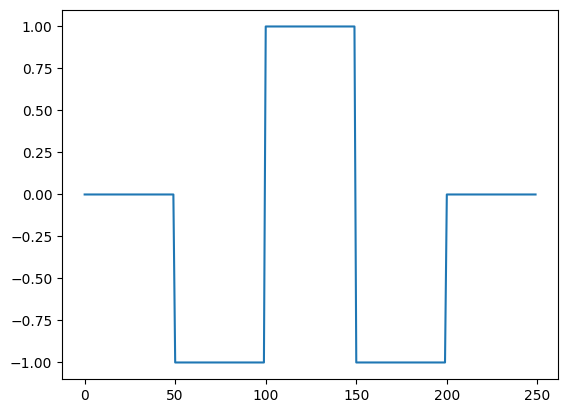

In [2]:
vimp = np.repeat([0, -1, 1, -1, 0], 50)
plt.plot(np.arange(vimp.size), vimp)

# Исходные сигналы

In [3]:
u = Signal.load_from_csv(Path(r"tests/data/sync/u.csv"))
x1 = Signal.load_from_csv(Path(r"tests/data/sync/x1.csv"), dt=u.dt)
x2 = Signal.load_from_csv(Path(r"tests/data/sync/x2.csv"), dt=u.dt)

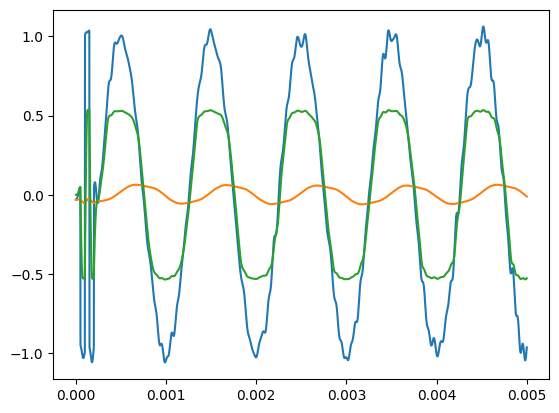

In [4]:
plt.plot(u.t, u.values)
plt.plot(x1.t, x1.values)
plt.plot(x2.t, x2.values)
plt.show()

# Сдвинутые сигналы

In [5]:
t = 0.0003
v = np.full(int(t / u.dt), fill_value=x1.values[0])
x1.values = np.hstack((v, x1.values))

t = 0.0007
v = np.full(int(t / u.dt), fill_value=x2.values[0])
x2.values = np.hstack((v, x2.values))

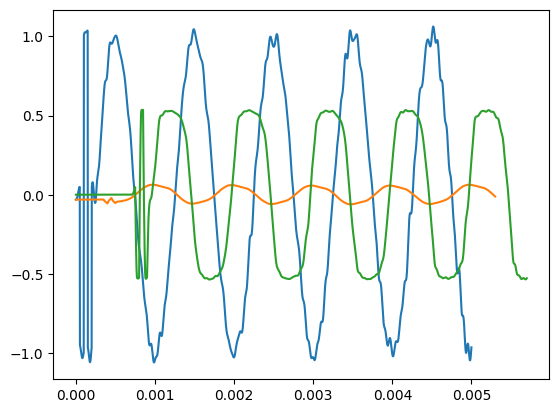

In [6]:
plt.plot(u.t, u.values)
plt.plot(x1.t, x1.values)
plt.plot(x2.t, x2.values)
plt.show()

# Устранение запаздывания

Вычислям сдвиги

In [7]:
u_t0 = search_sync_signal(u.values) * u.dt
x1_t0 = search_sync_signal(x1.values) * x1.dt
x2_t0 = search_sync_signal(x2.values) * x2.dt

Обрезаем

In [8]:
u_sync = u.cut(t0=u_t0)
x1_sync = x1.cut(t0=x1_t0)
x2_sync = x2.cut(t0=x2_t0)
u_sync.t0 = x1_sync.t0 = x2_sync.t0 = 0.0

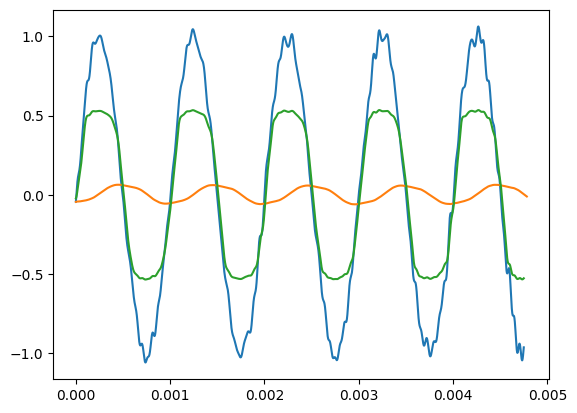

In [9]:
plt.plot(u_sync.t, u_sync.values)
plt.plot(x1_sync.t, x1_sync.values)
plt.plot(x2_sync.t, x2_sync.values)
plt.show()